# Challenge Telecom X

## Extracción de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
data = requests.get(url)
if data.status_code == 200:
    data = data.json()
    print(data)
else:
    print(f"Error al acceder a la URL: {data.status_code}")

[{'customerID': '0002-ORFBO', 'Churn': 'No', 'customer': {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}, 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'}, 'internet': {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}, 'account': {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}}, {'customerID': '0003-MKNFE', 'Churn': 'No', 'customer': {'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}, 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}, 'internet': {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}, 'account': {'Contract': 'Month-to-month', 'PaperlessBilling': 'No', 'PaymentMeth

## Tranformación de datos

In [3]:
data = pd.DataFrame(data)
data.head(5)

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [5]:
data.dtypes

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

In [6]:
data_normalize_customer = data['customer'].apply(pd.Series)
data_normalize_phone = data['phone'].apply(pd.Series)
data_normalize_internet = data['internet'].apply(pd.Series)
data_normalize_account = data['account'].apply(pd.Series)


In [7]:
data_normalized = pd.concat([
    data_normalize_customer,
    data_normalize_phone,
    data_normalize_internet,
    data_normalize_account
], axis=1)


In [8]:
data_normalized.head(5)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes        Yes       9          Yes   
1    Male              0      No         No       9          Yes   
2    Male              0      No         No       4          Yes   
3    Male              1     Yes         No      13          Yes   
4  Female              1     Yes         No       3          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   
1           Yes             DSL             No           No               No   
2            No     Fiber optic             No           No              Yes   
3            No     Fiber optic             No          Yes              Yes   
4            No     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year              Yes   
1          No          No             Yes  Month-to-month               No   
2          No          No              No  Month-to-month              Yes   
3          No         Yes             Yes  Month-to-month              Yes   
4         Yes         Yes              No  Month-to-month              Yes   

      PaymentMethod                                Charges  
0      Mailed check    {'Monthly': 65.6, 'Total': '593.3'}  
1      Mailed check    {'Monthly': 59.9, 'Total': '542.4'}  
2  Electronic check   {'Monthly': 73.9, 'Total': '280.85'}  
3  Electronic check  {'Monthly': 98.0, 'Total': '1237.85'}  
4      Mailed check    {'Monthly': 83.9, 'Total': '267.4'}

In [9]:
data_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7267 non-null   object
 1   SeniorCitizen     7267 non-null   int64 
 2   Partner           7267 non-null   object
 3   Dependents        7267 non-null   object
 4   tenure            7267 non-null   int64 
 5   PhoneService      7267 non-null   object
 6   MultipleLines     7267 non-null   object
 7   InternetService   7267 non-null   object
 8   OnlineSecurity    7267 non-null   object
 9   OnlineBackup      7267 non-null   object
 10  DeviceProtection  7267 non-null   object
 11  TechSupport       7267 non-null   object
 12  StreamingTV       7267 non-null   object
 13  StreamingMovies   7267 non-null   object
 14  Contract          7267 non-null   object
 15  PaperlessBilling  7267 non-null   object
 16  PaymentMethod     7267 non-null   object
 17  Charges       

In [10]:
data_normalize_sub_charges = pd.json_normalize(data_normalized['Charges'])

In [11]:
data_normalize_sub_charges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Monthly  7267 non-null   float64
 1   Total    7267 non-null   object 
dtypes: float64(1), object(1)
memory usage: 113.7+ KB


In [12]:
data.isnull().sum()
data.describe(include='all')

customerID Churn                                           customer  \
count         7267  7267                                               7267   
unique        7267     3                                                891   
top     9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
freq             1  5174                                                223   

                                                 phone  \
count                                             7267   
unique                                               3   
top     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
freq                                              3495   

                                                 internet  \
count                                                7267   
unique                                                129   
top     {'InternetService': 'No', 'OnlineSecurity': 'N...   
freq                                                 1581   

                                                  account  
count                                                7267  
unique                                               6931  
top     {'Contract': 'Month-to-month', 'PaperlessBilli...  
freq                                                    6

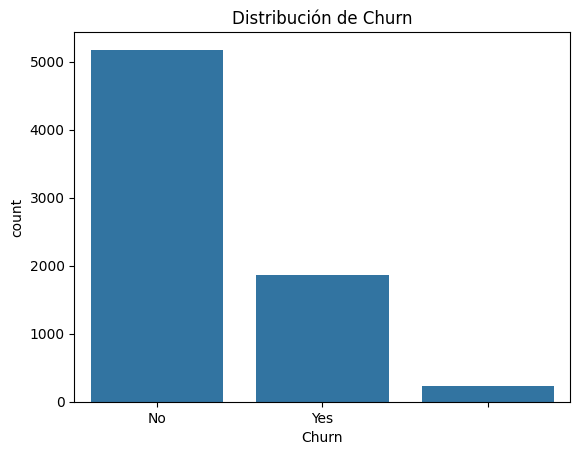

In [13]:
# Visualiza la distribución de Churn
data_normalized['Churn'] = data['Churn']
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=data_normalized)
plt.title('Distribución de Churn')
plt.show()


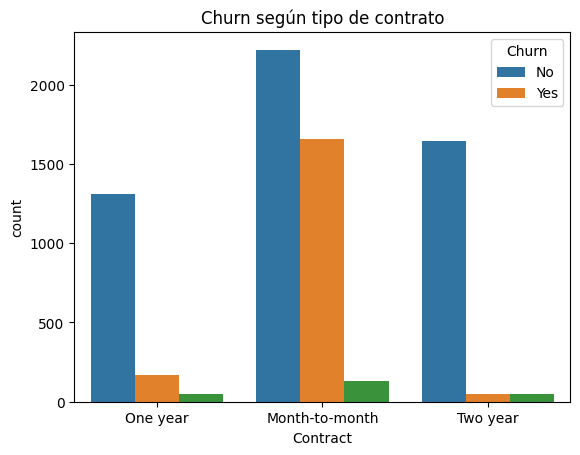

In [14]:
sns.countplot(x='Contract', hue='Churn', data=data_normalized)
plt.title('Churn según tipo de contrato')
plt.show()


In [15]:
import numpy as np

In [16]:
data_normalize_sub_charges

Monthly    Total
0       65.60    593.3
1       59.90    542.4
2       73.90   280.85
3       98.00  1237.85
4       83.90    267.4
...       ...      ...
7262    55.15    742.9
7263    85.10   1873.7
7264    50.30    92.75
7265    67.85  4627.65
7266    59.00   3707.6

[7267 rows x 2 columns]

In [17]:
data_normalize_sub_charges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Monthly  7267 non-null   float64
 1   Total    7267 non-null   object 
dtypes: float64(1), object(1)
memory usage: 113.7+ KB


In [18]:
data_normalize_sub_charges['Total'] = data_normalize_sub_charges['Total'].replace(r'^\s*$', np.nan, regex=True)

In [19]:
data_normalize_sub_charges['Total'] = data_normalize_sub_charges['Total'].astype(np.float64)

In [20]:
data_normalize_sub_charges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Monthly  7267 non-null   float64
 1   Total    7256 non-null   float64
dtypes: float64(2)
memory usage: 113.7 KB


In [21]:
#Ganacia por día
data_normalize_sub_charges['Cuentas_diarias'] = data_normalize_sub_charges['Monthly'] / 30
data_normalize_sub_charges

Monthly    Total  Cuentas_diarias
0       65.60   593.30         2.186667
1       59.90   542.40         1.996667
2       73.90   280.85         2.463333
3       98.00  1237.85         3.266667
4       83.90   267.40         2.796667
...       ...      ...              ...
7262    55.15   742.90         1.838333
7263    85.10  1873.70         2.836667
7264    50.30    92.75         1.676667
7265    67.85  4627.65         2.261667
7266    59.00  3707.60         1.966667

[7267 rows x 3 columns]

In [22]:
data_normalized['Cuentas_Diarias'] = data_normalize_sub_charges['Cuentas_diarias']

In [23]:
data_normalized.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes        Yes       9          Yes   
1    Male              0      No         No       9          Yes   
2    Male              0      No         No       4          Yes   
3    Male              1     Yes         No      13          Yes   
4  Female              1     Yes         No       3          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   
1           Yes             DSL             No           No               No   
2            No     Fiber optic             No           No              Yes   
3            No     Fiber optic             No          Yes              Yes   
4            No     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year              Yes   
1          No          No             Yes  Month-to-month               No   
2          No          No              No  Month-to-month              Yes   
3          No         Yes             Yes  Month-to-month              Yes   
4         Yes         Yes              No  Month-to-month              Yes   

      PaymentMethod                                Charges Churn  \
0      Mailed check    {'Monthly': 65.6, 'Total': '593.3'}    No   
1      Mailed check    {'Monthly': 59.9, 'Total': '542.4'}    No   
2  Electronic check   {'Monthly': 73.9, 'Total': '280.85'}   Yes   
3  Electronic check  {'Monthly': 98.0, 'Total': '1237.85'}   Yes   
4      Mailed check    {'Monthly': 83.9, 'Total': '267.4'}   Yes   

   Cuentas_Diarias  
0         2.186667  
1         1.996667  
2         2.463333  
3         3.266667  
4         2.796667

In [24]:
cols_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
                 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols_binarias:
    data_normalized[col] = data_normalized[col].map({'Yes': 1, 'No': 0})

In [25]:
data_normalized.rename(columns={
    'gender': 'genero',
    'SeniorCitizen': 'adulto_mayor',
    'Partner': 'tiene_pareja',
    'Dependents': 'dependientes',
    'tenure': 'antiguedad_meses',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguridad_en_linea',
    'OnlineBackup': 'respaldo_en_linea',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'peliculas_streaming',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'factura_papel',
    'PaymentMethod': 'metodo_pago',
    'Charges': 'cargos',
    'Churn': 'cambio_proveedor'
}, inplace=True)


In [26]:
data_normalized = pd.get_dummies(data_normalized, columns=['tipo_internet', 'tipo_contrato', 'metodo_pago'], drop_first=True)

In [27]:
data_normalized.head()

genero  adulto_mayor  tiene_pareja  dependientes  antiguedad_meses  \
0  Female             0             1             1                 9   
1    Male             0             0             0                 9   
2    Male             0             0             0                 4   
3    Male             1             1             0                13   
4  Female             1             1             0                 3   

   servicio_telefonico  lineas_multiples  seguridad_en_linea  \
0                    1               0.0                 0.0   
1                    1               1.0                 0.0   
2                    1               0.0                 0.0   
3                    1               0.0                 0.0   
4                    1               0.0                 0.0   

   respaldo_en_linea  proteccion_dispositivo  ...  \
0                1.0                     0.0  ...   
1                0.0                     0.0  ...   
2                0.0                     1.0  ...   
3                1.0                     1.0  ...   
4                0.0                     0.0  ...   

                                  cargos  cambio_proveedor  Cuentas_Diarias  \
0    {'Monthly': 65.6, 'Total': '593.3'}                No         2.186667   
1    {'Monthly': 59.9, 'Total': '542.4'}                No         1.996667   
2   {'Monthly': 73.9, 'Total': '280.85'}               Yes         2.463333   
3  {'Monthly': 98.0, 'Total': '1237.85'}               Yes         3.266667   
4    {'Monthly': 83.9, 'Total': '267.4'}               Yes         2.796667   

   tipo_internet_Fiber optic tipo_internet_No tipo_contrato_One year  \
0                      False            False                   True   
1                      False            False                  False   
2                       True            False                  False   
3                       True            False                  False   
4                       True            False                  False   

   tipo_contrato_Two year  metodo_pago_Credit card (automatic)  \
0                   False                                False   
1                   False                                False   
2                   False                                False   
3                   False                                False   
4                   False                                False   

   metodo_pago_Electronic check  metodo_pago_Mailed check  
0                         False                      True  
1                         False                      True  
2                          True                     False  
3                          True                     False  
4                         False                      True  

[5 rows x 24 columns]

## Análisis Descriptivo

In [28]:
data_normalized[['antiguedad_meses', 'Cuentas_Diarias']].describe()

antiguedad_meses  Cuentas_Diarias
count       7267.000000      7267.000000
mean          32.346498         2.157337
std           24.571773         1.004319
min            0.000000         0.608333
25%            9.000000         1.180833
50%           29.000000         2.343333
75%           55.000000         2.995833
max           72.000000         3.958333

In [29]:
mediana_antiguedad = data_normalized['antiguedad_meses'].median()
mediana_antiguedad

29.0

In [30]:
mediana_cuentas = data_normalized['Cuentas_Diarias'].median()
mediana_cuentas

2.3433333333333333

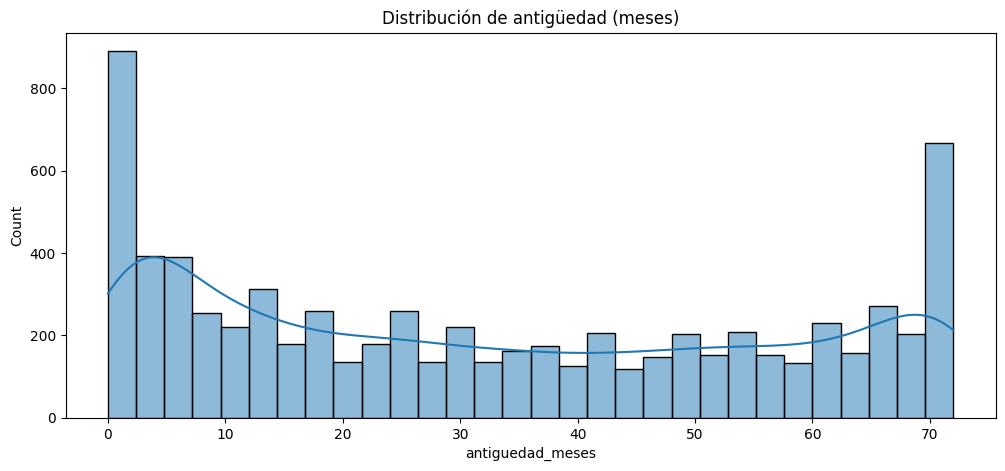

In [32]:
plt.figure(figsize=(12,5))
sns.histplot(data_normalized['antiguedad_meses'], kde=True, bins=30)
plt.title('Distribución de antigüedad (meses)')
plt.show()

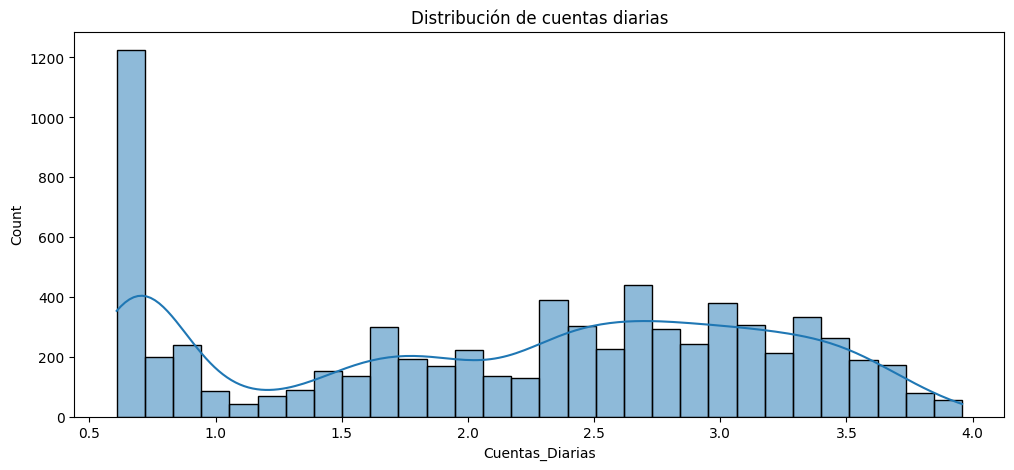

In [33]:
plt.figure(figsize=(12,5))
sns.histplot(data_normalized['Cuentas_Diarias'], kde=True, bins=30)
plt.title('Distribución de cuentas diarias')
plt.show()

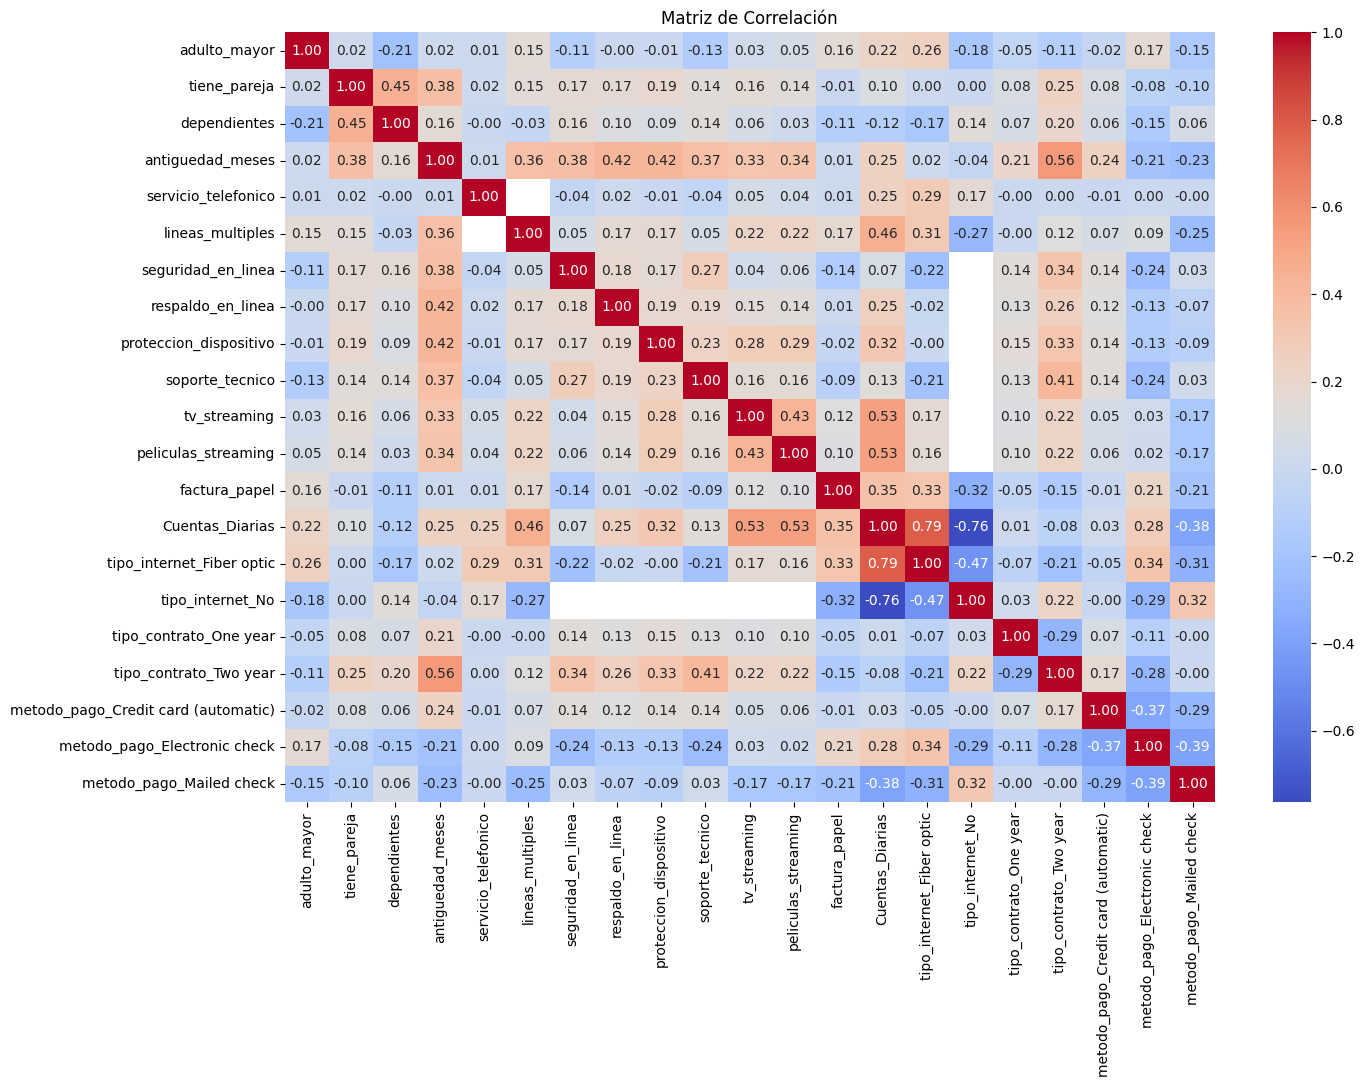

In [34]:
correlation_matrix = data_normalized.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [35]:
data_normalized.groupby('cambio_proveedor')[['antiguedad_meses', 'Cuentas_Diarias']].agg(['mean', 'median', 'std'])

antiguedad_meses                   Cuentas_Diarias            \
                             mean median        std            mean    median   
cambio_proveedor                                                                
                        31.571429   29.0  24.998552        2.113743  2.303333   
No                      37.569965   38.0  24.113777        2.042171  2.147500   
Yes                     17.979133   10.0  19.531123        2.481378  2.655000   

                            
                       std  
cambio_proveedor            
                  1.046290  
No                1.036422  
Yes               0.822202

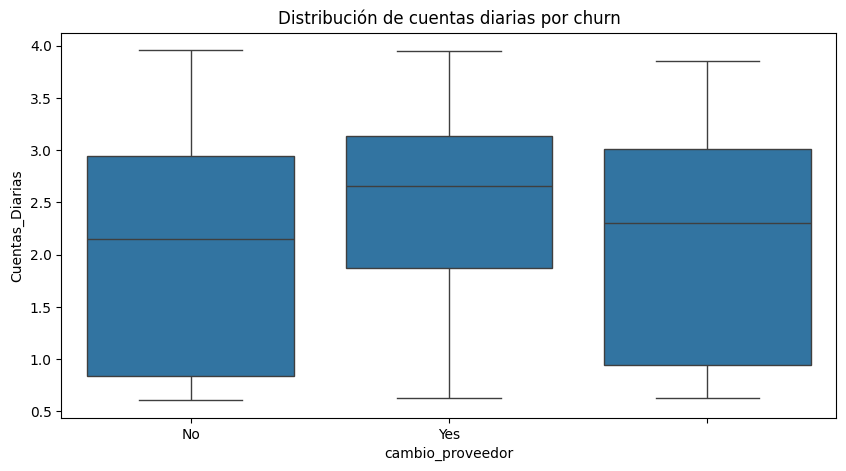

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cambio_proveedor', y='Cuentas_Diarias', data=data_normalized)
plt.title('Distribución de cuentas diarias por churn')
plt.show()

<ipython-input-37-1962664170>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cambio_proveedor', data=data_normalized, palette='Set2')


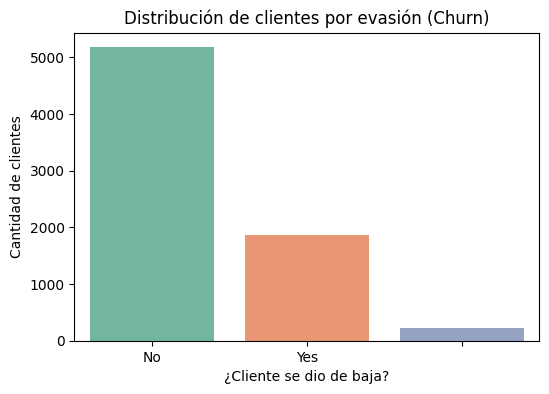

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='cambio_proveedor', data=data_normalized, palette='Set2')
plt.title('Distribución de clientes por evasión (Churn)')
plt.xlabel('¿El cliente se dio de baja?')
plt.ylabel('Cantidad de clientes')
plt.show()

In [39]:
porcentaje_churn = data_normalized['cambio_proveedor'].value_counts(normalize=True) * 100
print(porcentaje_churn)

cambio_proveedor
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


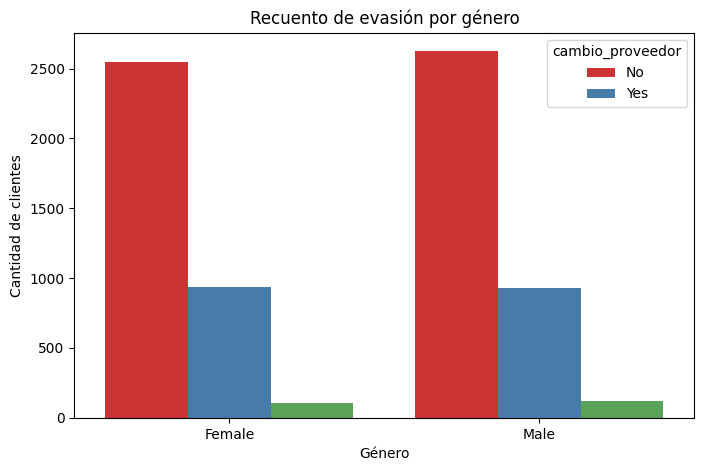

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(x='genero', hue='cambio_proveedor', data=data_normalized, palette='Set1')
plt.title('Recuento de evasión por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de clientes')
plt.show()

In [42]:
print(data_normalized.columns)

Index(['genero', 'adulto_mayor', 'tiene_pareja', 'dependientes',
       'antiguedad_meses', 'servicio_telefonico', 'lineas_multiples',
       'seguridad_en_linea', 'respaldo_en_linea', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'factura_papel', 'cargos', 'cambio_proveedor', 'Cuentas_Diarias',
       'tipo_internet_Fiber optic', 'tipo_internet_No',
       'tipo_contrato_One year', 'tipo_contrato_Two year',
       'metodo_pago_Credit card (automatic)', 'metodo_pago_Electronic check',
       'metodo_pago_Mailed check'],
      dtype='object')


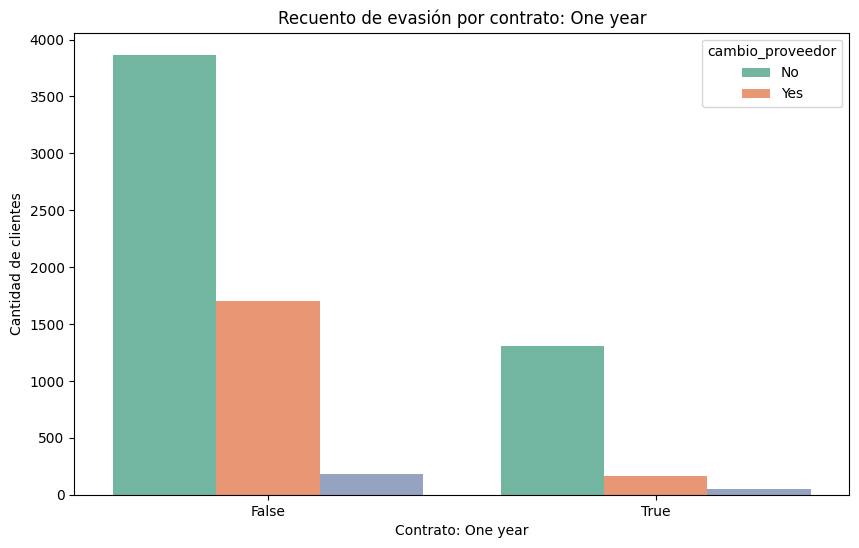

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(x='tipo_contrato_One year', hue='cambio_proveedor', data=data_normalized, palette='Set2')
plt.title('Recuento de evasión por contrato: One year')
plt.xlabel('Contrato: One year')
plt.ylabel('Cantidad de clientes')
plt.show()

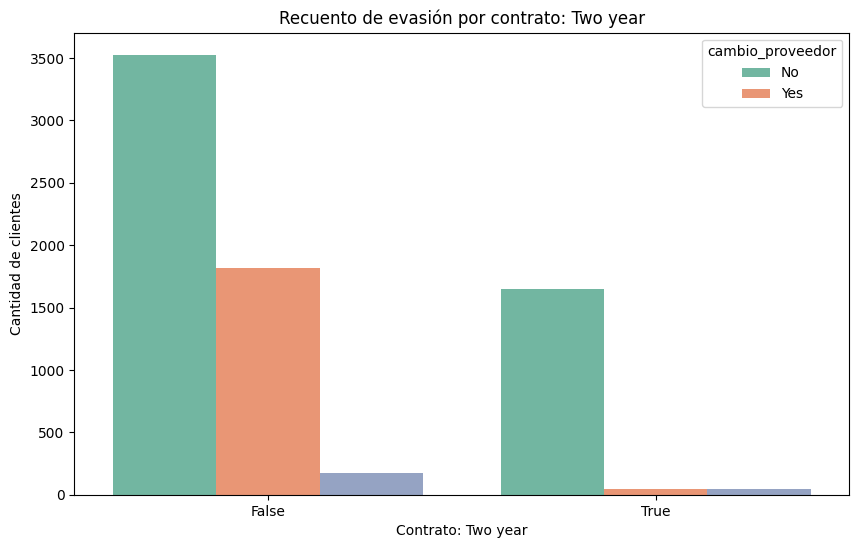

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x='tipo_contrato_Two year', hue='cambio_proveedor', data=data_normalized, palette='Set2')
plt.title('Recuento de evasión por contrato: Two year')
plt.xlabel('Contrato: Two year')
plt.ylabel('Cantidad de clientes')
plt.show()

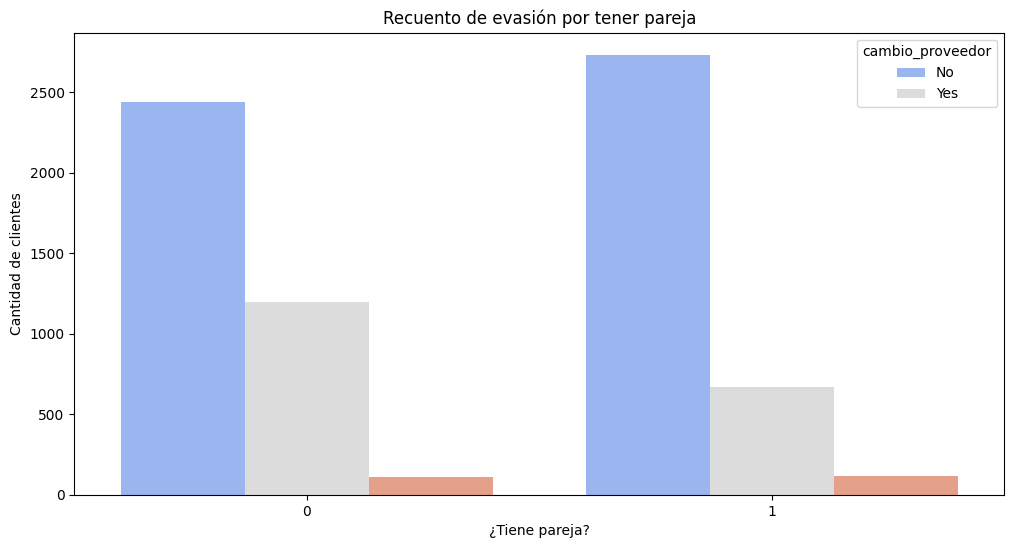

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x='tiene_pareja', hue='cambio_proveedor', data=data_normalized, palette='coolwarm')
plt.title('Recuento de evasión por tener pareja')
plt.xlabel('¿Tiene pareja?')
plt.ylabel('Cantidad de clientes')
plt.show()

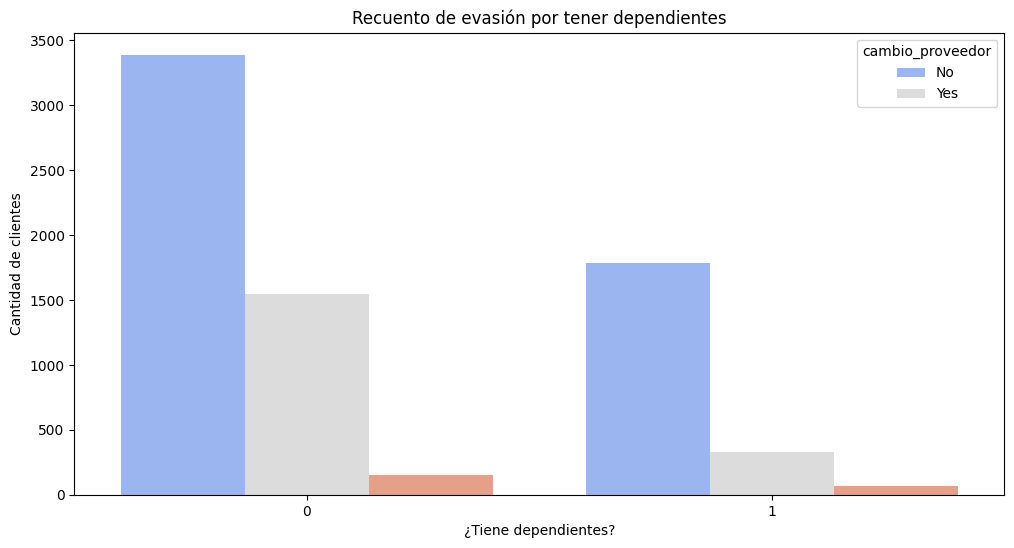

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(x='dependientes', hue='cambio_proveedor', data=data_normalized, palette='coolwarm')
plt.title('Recuento de evasión por tener dependientes')
plt.xlabel('¿Tiene dependientes?')
plt.ylabel('Cantidad de clientes')
plt.show()

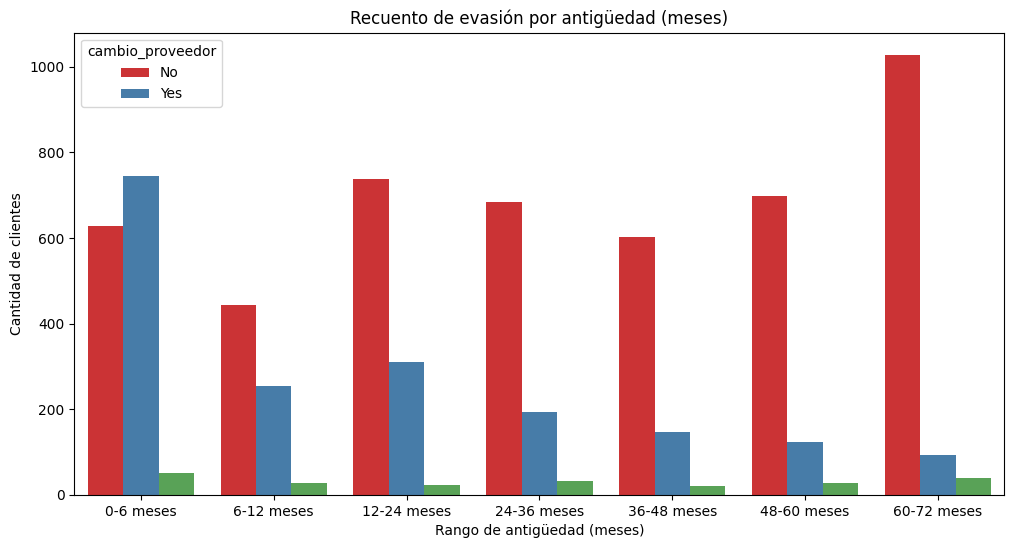

In [50]:
bins = [0, 6, 12, 24, 36, 48, 60, 72]
labels = ['0-6 meses', '6-12 meses', '12-24 meses', '24-36 meses', '36-48 meses', '48-60 meses', '60-72 meses']
data_normalized['rango_antiguedad'] = pd.cut(data_normalized['antiguedad_meses'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12,6))
sns.countplot(x='rango_antiguedad', hue='cambio_proveedor', data=data_normalized, palette='Set1')
plt.title('Recuento de evasión por antigüedad (meses)')
plt.xlabel('Rango de antigüedad (meses)')
plt.ylabel('Cantidad de clientes')
plt.show()


In [53]:
data_normalized['cargos_monthly'] = data_normalized['cargos'].apply(lambda x: x['Monthly'] if isinstance(x, dict) else x)

<ipython-input-54-4063134361>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cambio_proveedor', y='cargos_monthly', data=data_normalized, palette='Set1')


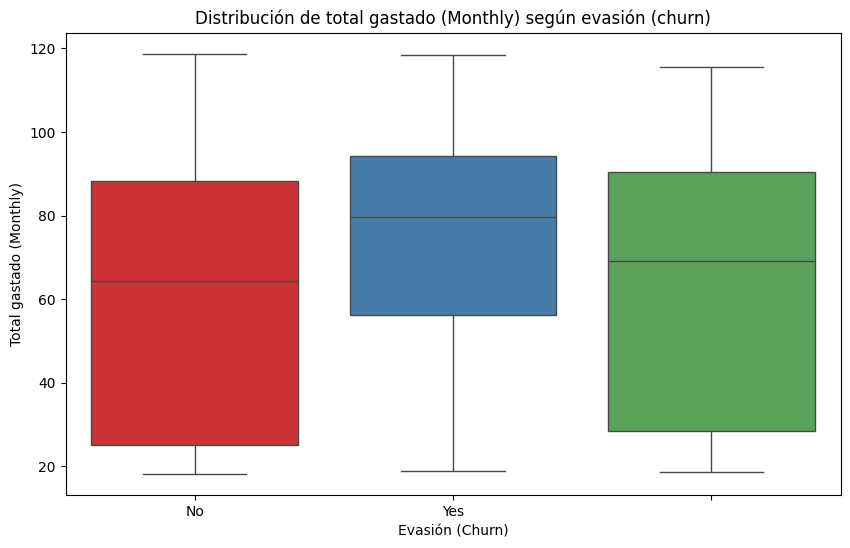

In [54]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cambio_proveedor', y='cargos_monthly', data=data_normalized, palette='Set1')
plt.title('Distribución de total gastado (Monthly) según evasión (churn)')
plt.xlabel('Evasión (Churn)')
plt.ylabel('Total gastado (Monthly)')
plt.show()

<ipython-input-55-4113962442>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cambio_proveedor', y='antiguedad_meses', data=data_normalized, palette='Set2')


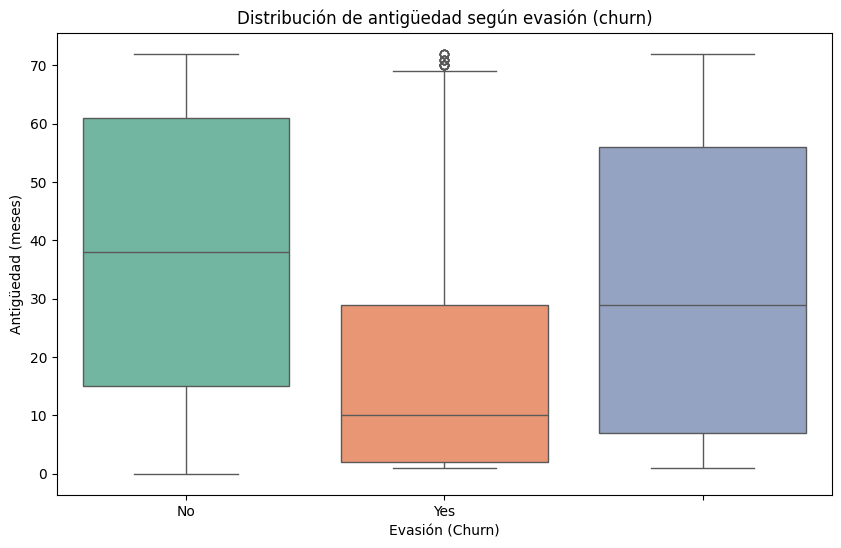

In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cambio_proveedor', y='antiguedad_meses', data=data_normalized, palette='Set2')
plt.title('Distribución de antigüedad según evasión (churn)')
plt.xlabel('Evasión (Churn)')
plt.ylabel('Antigüedad (meses)')
plt.show()

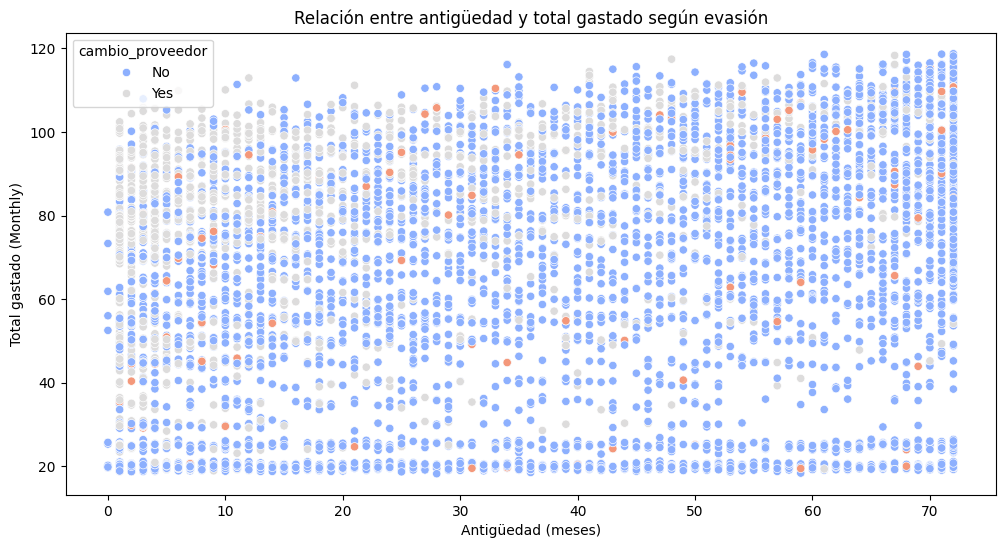

In [56]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='antiguedad_meses', y='cargos_monthly', hue='cambio_proveedor', data=data_normalized, palette='coolwarm')
plt.title('Relación entre antigüedad y total gastado según evasión')
plt.xlabel('Antigüedad (meses)')
plt.ylabel('Total gastado (Monthly)')
plt.show()

<ipython-input-57-941641991>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cambio_proveedor', y='Cuentas_Diarias', data=data_normalized, palette='Set3')


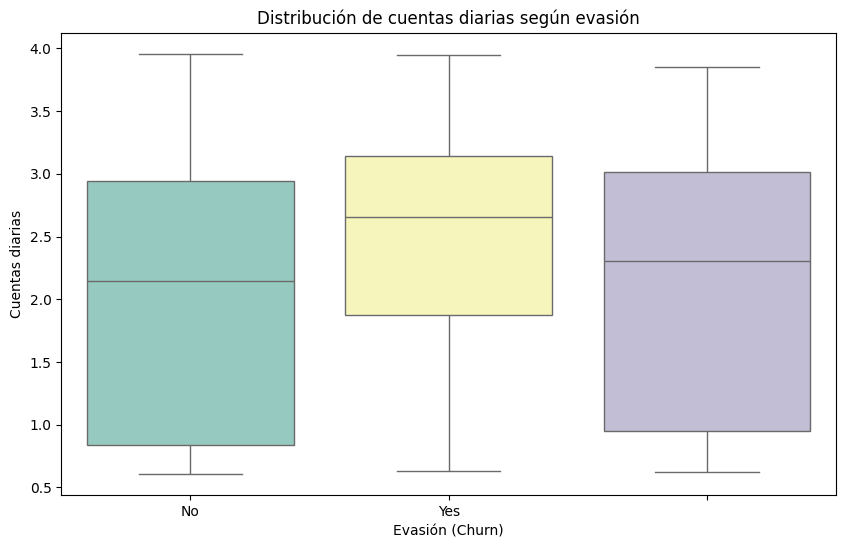

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cambio_proveedor', y='Cuentas_Diarias', data=data_normalized, palette='Set3')
plt.title('Distribución de cuentas diarias según evasión')
plt.xlabel('Evasión (Churn)')
plt.ylabel('Cuentas diarias')
plt.show()

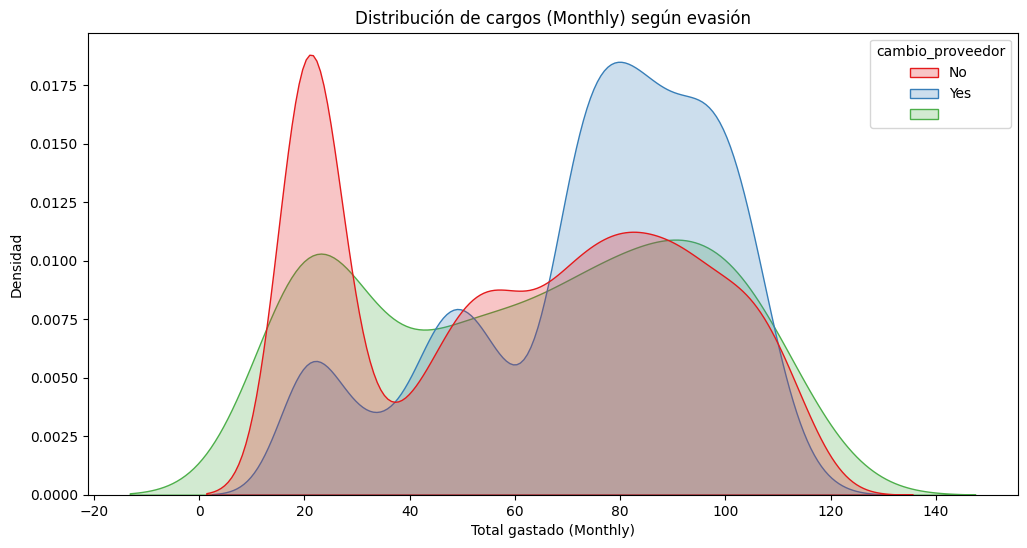

In [58]:
# Para cargos_monthly
plt.figure(figsize=(12,6))
sns.kdeplot(data=data_normalized, x='cargos_monthly', hue='cambio_proveedor', fill=True, common_norm=False, palette='Set1')
plt.title('Distribución de cargos (Monthly) según evasión')
plt.xlabel('Total gastado (Monthly)')
plt.ylabel('Densidad')
plt.show()

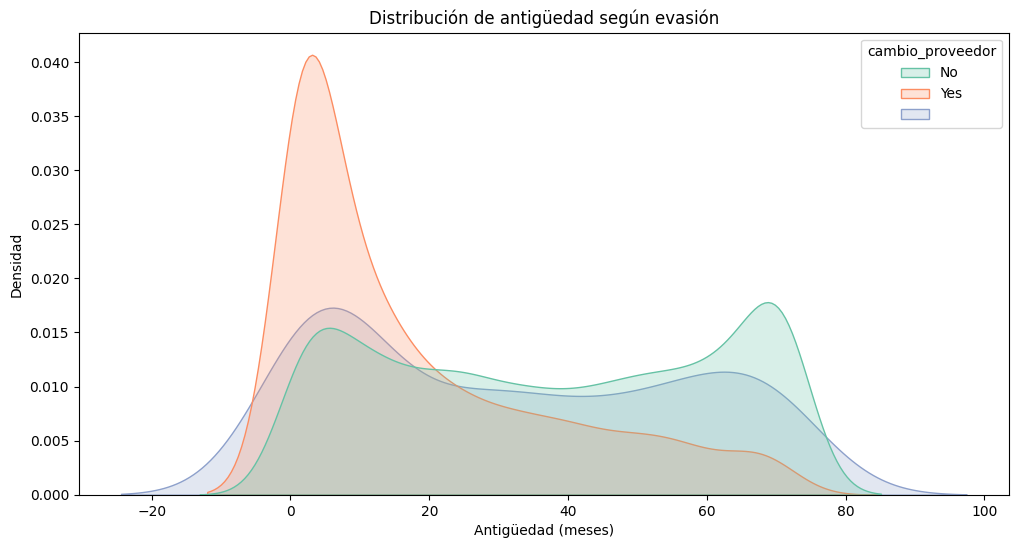

In [59]:
# Para antigüedad en meses
plt.figure(figsize=(12,6))
sns.kdeplot(data=data_normalized, x='antiguedad_meses', hue='cambio_proveedor', fill=True, common_norm=False, palette='Set2')
plt.title('Distribución de antigüedad según evasión')
plt.xlabel('Antigüedad (meses)')
plt.ylabel('Densidad')
plt.show()

# Informe de Análisis de Evasión de Clientes (Churn)

## Introducción

El objetivo de este análisis es estudiar el comportamiento de los clientes de una empresa de telecomunicaciones en relación con la **evasión de clientes** o **Churn**. El término "Churn" hace referencia a los clientes que deciden cancelar sus servicios o cambiar de proveedor.

El análisis busca identificar patrones en los datos que nos permitan comprender las razones detrás de la evasión, como características demográficas, el tipo de servicio, el tiempo de permanencia en la empresa y el gasto de los clientes. Este entendimiento es fundamental para desarrollar estrategias efectivas que ayuden a reducir la tasa de evasión y mejorar la retención de clientes.

---

## Limpieza y Tratamiento de Datos

En esta etapa, se llevaron a cabo los siguientes pasos de **importación**, **limpieza** y **procesamiento** de los datos:

1. **Importación de Datos**: Los datos fueron obtenidos desde un archivo JSON almacenado en una URL pública, que contiene información sobre los clientes y sus características.

2. **Normalización de Datos**: Se normalizaron varias columnas que contenían datos en formato diccionario para convertirlos en columnas individuales. Por ejemplo, se separaron las características del cliente (género, si tiene pareja, si tiene dependientes, etc.), los detalles del servicio telefónico (tipo de servicio, si tiene líneas múltiples, etc.), y los datos del contrato (tipo de contrato, método de pago, etc.).

3. **Tratamiento de Datos Nulos**: Se verificaron los datos faltantes y se realizaron las transformaciones necesarias, como convertir las columnas de **cargos** (que originalmente contenían diccionarios) a valores numéricos para su análisis.

4. **Codificación de Variables Categóricas**: Las variables categóricas (como género, tipo de contrato, etc.) fueron convertidas a variables numéricas utilizando un mapeo binario (0 o 1) y se crearon variables dummy para aquellas categorías con más de dos valores posibles (por ejemplo, tipo de internet y método de pago).

---

## Análisis Exploratorio de Datos

En este análisis, nos enfocamos en identificar patrones que pudieran indicar las razones detrás de la evasión de clientes. A continuación, se presentan los principales análisis realizados:

### Distribución de Evasión (Churn)

Se visualizó la distribución de los clientes que se dieron de baja (`cambio_proveedor = 'Yes'`) y los que permanecieron (`cambio_proveedor = 'No'`) utilizando gráficos de barras.

```python
# Visualización de la distribución de Churn
sns.countplot(x='cambio_proveedor', data=data_normalized, palette='Set1')
plt.title('Distribución de Evasión de Clientes (Churn)')
plt.xlabel('Evasión (Churn)')
plt.ylabel('Número de Clientes')
plt.show()
